In [3]:
import numpy as np 
import matplotlib as mplt
from scipy import signal
from matplotlib import pyplot as plt
from astropy.table import Table 
from scipy.signal import savgol_filter
from spectres import spectres
from astropy.time import Time
from extinction import fitzpatrick99 as f99
from extinction import apply


font = {'family': 'serif',
        #'color':  'black',
        #'weight': 'normal',
        'size': 26}
mplt.rc('font', **font)
mplt.rc("text", usetex=True)

In [10]:
##TO GET FITS TO TXT
#from astropy.io import fits
#import numpy as np
#import matplotlib.pyplot as plt
#file='sp/SN2020jgl-SALT-20200524.fits'
#aaa=fits.open(file)
##aaa.info()
#head=aaa[0].header
#flux=aaa[0].data
#wave=head['CRVAL1']+np.arange(head['NAXIS1'])*head['CDELT1']
#file = np.array([wave[0:-2],flux[0:-2]])
#file = file.T
#print(flux)
#with open('sp/SN2020jgl-SALT-20200524.txt', 'w+') as datafile_id:
#    np.savetxt(datafile_id, file, fmt=['%f','%e'])
#
##vel=np.array([5916,5958,5974,5997,6023])   
##print(300000*((((vel-6355)/6355 + 1)**2 - 1)/(((vel-6355)/6355 + 1)**2 + 1)))

In [24]:
tmax=58993.096
z20jgl=0.006758

path='/home/lara/ICE/spectra_series/2020jgl/'

sp1=Table.read(path+'20200507.txt', format='ascii', names=('w','f'))
sp1_2=Table.read(path+'20200507.txt', format='ascii', names=('w','f'))
sp2=Table.read(path+'SN2020jgl_20200508_193050_SALT_v1.ascii', format='ascii', names=('w','f'))
sp3=Table.read(path+'20200508.txt', format='ascii', names=('w','f'))         
sp4=Table.read(path+'20200509.txt', format='ascii', names=('w','f'))         
sp5=Table.read(path+'SN2020jgl_20200511_redblu_111537.068.ascii', format='ascii', names=('w','f'))
sp6=Table.read(path+'nttSN2020jgl_fts_20200511_merge_2.0_58981_1_2df_ex.txt', format='ascii', names=('w','f')) #MAX
sp7=Table.read(path+'SN2020jgl_20200513_redblu_092239.362.ascii', format='ascii', names=('w','f'))
sp8=Table.read(path+'nttSN2020jgl_fts_20200514_merge_2.0_58984_1_2df_ex.txt', format='ascii', names=('w','f')) #MAX
sp9=Table.read(path+'SN2020jgl_20200515_redblu_091510.442.ascii', format='ascii', names=('w','f'))
sp10=Table.read(path+'nttSN2020jgl_ftn_20200520_merge_2.0_58990_1_2df_ex.txt', format='ascii', names=('w','f')) #MAX
sp11=Table.read(path+'20200520_LT.txt', format='ascii', names=('w','f'))
sp12=Table.read(path+'20200523_LT.txt', format='ascii', names=('w','f'))
sp13=Table.read(path+'SN2020jgl_20200524_redblu_091926.029.ascii', format='ascii', names=('w','f'))
sp14=Table.read(path+'SN2020jgl_20200524_182041_SALT_v1.ascii', format='ascii', names=('w','f'))
sp15=Table.read(path+'sn2020jgl-20200525.183.coadd.blotch-ui.flm', format='ascii', names=('w','f','e'))
sp16=Table.read(path+'SN2020jgl_20200528_redblu_094730.007.ascii', format='ascii', names=('w','f'))
sp17=Table.read(path+'sn2020jgl-20200529.183.coadd.blotch-ui.flm', format='ascii', names=('w','f','e'))
sp18=Table.read(path+'SN2020jgl_20200602_174459_SALT_v1.ascii', format='ascii', names=('w','f'))
sp19=Table.read(path+'SN2020jgl_20200604_redblu_091239.648.ascii', format='ascii', names=('w','f'))
sp20=Table.read(path+'SN2020jgl_20200606_172626_SALT_v1.ascii', format='ascii', names=('w','f'))
sp21=Table.read(path+'SN2020jgl_20200612_redblu_091515.398.ascii', format='ascii', names=('w','f'))
sp22=Table.read(path+'SN2020jgl_20200630_redblu_082813.582.ascii', format='ascii', names=('w','f'))
sp23=Table.read(path+'SN2020jgl_20210218_GTC.txt', format='ascii', names=('w','f'))



t=['2020-05-07T21:29:06'    ,'2020-05-07T21:29:06.883','2020-05-08T19:46:30'    ,'2020-05-08T21:02:44'    ,'2020-05-09T21:28:22'    ,'2020-05-11T09:14:42'    ,'2020-05-11T11:15:36'    ,
   '2020-05-13T09:22:39'    ,'2020-05-14T11:27:24'    ,'2020-05-15T09:15:10'    ,'2020-05-20T06:13:21'    ,'2020-05-20T20:53:17'    ,'2020-05-23T20:56:25'    ,
   '2020-05-24T09:19:26'    ,'2020-05-24T18:32:08.291','2020-05-25T04:19:27.11' ,'2020-05-28T09:47:30'    ,'2020-05-29T04:23:31.2'  ,'2020-06-02T18:01:27.425',
   '2020-06-04T09:12:39.648','2020-06-06T17:42:26.318','2020-06-12T09:15:15.398','2020-06-30T08:28:13.582','2021-02-18T23:30:01.123']
import numpy as np 
from astropy.time import Time
tt = Time(t, format='isot', scale='utc')
ep=(tt.mjd-tmax)/(1.+z20jgl)
print(ep)

ebv=0.0585 #+/-  0.0016 Schalfy 2011
sp1['f'] =apply(f99(sp1['w'],-3.1*ebv,3.1),sp1['f'])
sp2['f'] =apply(f99(sp2['w'],-3.1*ebv,3.1),sp2['f'])
sp3['f'] =apply(f99(sp3['w'],-3.1*ebv,3.1),sp3['f'])
sp4['f'] =apply(f99(sp4['w'],-3.1*ebv,3.1),sp4['f'])
sp5['f'] =apply(f99(sp5['w'],-3.1*ebv,3.1),sp5['f'])
sp6['f'] =apply(f99(sp6['w'],-3.1*ebv,3.1),sp6['f'])
sp7['f'] =apply(f99(sp7['w'],-3.1*ebv,3.1),sp7['f'])
sp8['f'] =apply(f99(sp8['w'],-3.1*ebv,3.1),sp8['f'])
sp9['f'] =apply(f99(sp9['w'],-3.1*ebv,3.1),sp9['f'])
sp10['f']=apply(f99(sp10['w'],-3.1*ebv,3.1),sp10['f'])
sp11['f']=apply(f99(sp11['w'],-3.1*ebv,3.1),sp11['f'])
sp12['f']=apply(f99(sp12['w'],-3.1*ebv,3.1),sp12['f'])
sp13['f']=apply(f99(sp13['w'],-3.1*ebv,3.1),sp13['f'])
sp14['f']=apply(f99(sp14['w'],-3.1*ebv,3.1),sp14['f'])
sp15['f']=apply(f99(sp15['w'],-3.1*ebv,3.1),sp15['f'])
sp16['f']=apply(f99(sp16['w'],-3.1*ebv,3.1),sp16['f'])
sp17['f']=apply(f99(sp17['w'],-3.1*ebv,3.1),sp17['f'])
sp18['f']=apply(f99(sp18['w'],-3.1*ebv,3.1),sp18['f'])
sp19['f']=apply(f99(sp19['w'],-3.1*ebv,3.1),sp19['f'])
sp20['f']=apply(f99(sp20['w'],-3.1*ebv,3.1),sp20['f'])
sp21['f']=apply(f99(sp21['w'],-3.1*ebv,3.1),sp21['f'])
sp22['f']=apply(f99(sp22['w'],-3.1*ebv,3.1),sp22['f'])
sp23['f']=apply(f99(sp23['w'],-3.1*ebv,3.1),sp23['f'])

sp1['w'] = sp1['w']/(1.+z20jgl)
sp2['w'] = sp2['w']/(1.+z20jgl)
sp3['w'] = sp3['w']/(1.+z20jgl)
sp4['w'] = sp4['w']/(1.+z20jgl)
sp5['w'] = sp5['w']/(1.+z20jgl)
sp6['w'] = sp6['w']/(1.+z20jgl)    
sp7['w'] = sp7['w']/(1.+z20jgl)    
sp8['w'] = sp8['w']/(1.+z20jgl)    
sp9['w'] = sp9['w']/(1.+z20jgl)    
sp10['w']=sp10['w']/(1.+z20jgl)    
sp11['w']=sp11['w']/(1.+z20jgl)
sp12['w']=sp12['w']/(1.+z20jgl)    
sp13['w']=sp13['w']/(1.+z20jgl)
sp14['w']=sp14['w']/(1.+z20jgl)
sp15['w']=sp15['w']/(1.+z20jgl)
sp16['w']=sp16['w']/(1.+z20jgl)
sp17['w']=sp17['w']/(1.+z20jgl)
sp18['w']=sp18['w']/(1.+z20jgl)
sp19['w']=sp19['w']/(1.+z20jgl)
sp20['w']=sp20['w']/(1.+z20jgl)
sp21['w']=sp21['w']/(1.+z20jgl)
sp22['w']=sp22['w']/(1.+z20jgl)
sp23['w']=sp23['w']/(1.+z20jgl)

sp1['f'] = sp1['f']*(1.+z20jgl)
sp2['f'] = sp2['f']*(1.+z20jgl)
sp3['f'] = sp3['f']*(1.+z20jgl)
sp4['f'] = sp4['f']*(1.+z20jgl)
sp5['f'] = sp5['f']*(1.+z20jgl)
sp6['f'] = sp6['f']*(1.+z20jgl)    
sp7['f'] = sp7['f']*(1.+z20jgl)    
sp8['f'] = sp8['f']*(1.+z20jgl)    
sp9['f'] = sp9['f']*(1.+z20jgl)    
sp10['f']=sp10['f']*(1.+z20jgl)    
sp11['f']=sp11['f']*(1.+z20jgl)
sp12['f']=sp12['f']*(1.+z20jgl)    
sp13['f']=sp13['f']*(1.+z20jgl)
sp14['f']=sp14['f']*(1.+z20jgl)
sp15['f']=sp15['f']*(1.+z20jgl)
sp16['f']=sp16['f']*(1.+z20jgl)
sp17['f']=sp17['f']*(1.+z20jgl)
sp18['f']=sp18['f']*(1.+z20jgl)
sp19['f']=sp19['f']*(1.+z20jgl)
sp20['f']=sp20['f']*(1.+z20jgl)
sp21['f']=sp21['f']*(1.+z20jgl)
sp22['f']=sp22['f']*(1.+z20jgl)
sp23['f']=sp23['f']*(1.+z20jgl)

x = np.arange(3500., 9500., 1.)
sp1res = spectres(x, sp1['w'], sp1['f'])
sp2res = spectres(x, sp2['w'], sp2['f'])
sp3res = spectres(x, sp3['w'], sp3['f'])
sp4res = spectres(x, sp4['w'], sp4['f'])
sp5res = spectres(x, sp5['w'], sp5['f'])
sp6res = spectres(x, sp6['w'], sp6['f'])
sp7res = spectres(x, sp7['w'], sp7['f'])
sp8res = spectres(x, sp8['w'], sp8['f'])
sp9res = spectres(x, sp9['w'], sp9['f'])
sp10res = spectres(x, sp10['w'], sp10['f'])
sp11res = spectres(x, sp11['w'], sp11['f'])
sp12res = spectres(x, sp12['w'], sp12['f'])
sp13res = spectres(x, sp13['w'], sp13['f'])  
sp14res = spectres(x, sp14['w'], sp14['f'])  
sp15res = spectres(x, sp15['w'], sp15['f'])  
sp16res = spectres(x, sp16['w'], sp16['f'])  
sp17res = spectres(x, sp17['w'], sp17['f'])  
sp18res = spectres(x, sp18['w'], sp18['f'])  
sp19res = spectres(x, sp19['w'], sp19['f'])  
sp20res = spectres(x, sp20['w'], sp20['f'])  
sp21res = spectres(x, sp21['w'], sp21['f'])  
sp22res = spectres(x, sp22['w'], sp22['f'])  
sp23res = spectres(x, sp23['w'], sp23['f'])  


[-1.60920416e+01 -1.51695260e+01 -1.51169416e+01 -1.41059728e+01
 -1.26254687e+01 -1.25420740e+01 -1.06334102e+01 -9.55407247e+00
 -8.65199739e+00 -3.81097460e+00 -3.20401164e+00 -2.21988229e-01
  2.90531955e-01  6.71778305e-01  1.07689721e+00  4.28304132e+00
  5.05285282e+00  9.59020128e+00  1.12120214e+01  1.35502321e+01
  1.91601109e+01  3.70068427e+01  2.69064839e+02]

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keywo

In [25]:
sp1res = sp1res
sp2res = sp2res/5.    
sp3res = sp3res/2.5   
sp4res = sp4res/2.    
sp5res = sp5res/8.    
sp6res = sp6res/1e21  
sp7res = sp7res/20.   
sp8res = sp8res/3e21  
sp9res = sp9res/20.   
sp10res=sp10res/2.5e21
sp11res=sp11res/50.   
sp12res=sp12res/50.   
sp13res=sp13res/60. 
sp14res=sp14res/60.
sp15res=sp15res/1e17
sp16res=sp16res/60. 
sp17res=sp17res/1e17 
sp18res=sp18res/40.
sp19res=sp19res/120. 
sp20res=sp20res/30. 
sp21res=sp21res/10. 
sp22res=sp22res/20. 
sp23res=sp23res


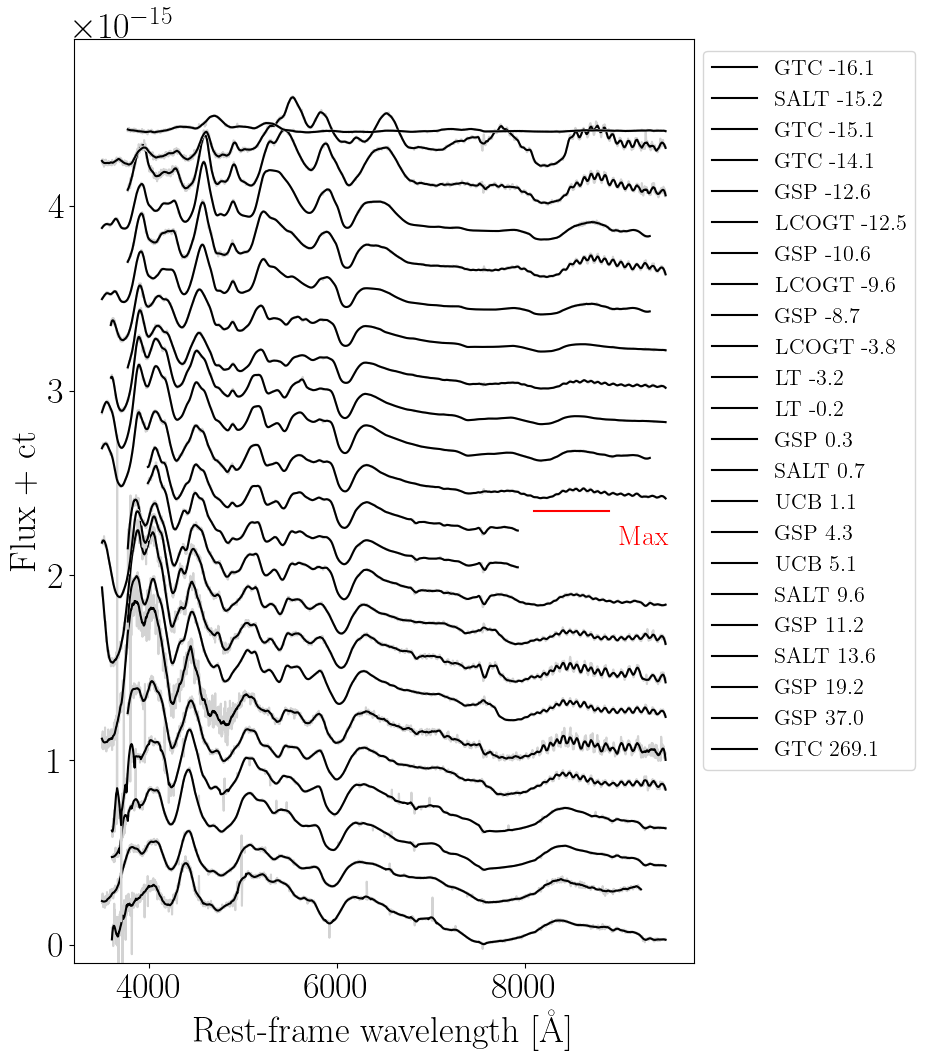

In [51]:
#t=['2020-05-09T21:28:22','2020-05-11T09:14:42']
#tnew45=Time((Time(t, format='isot', scale='utc').mjd[1]+Time(t, format='isot', scale='utc').mjd[0])/2, format='mjd', scale='utc')
#print(tnew45)
#sp45res=(sp4res+sp5res)/2.
#
#t=['2020-05-11T11:15:36','2020-05-13T09:22:39']
#tnew67=Time((Time(t, format='isot', scale='utc').mjd[1]+Time(t, format='isot', scale='utc').mjd[0])/2, format='mjd', scale='utc')
#print(tnew67)
#sp67res=(sp6res+sp7res)/2.
#
#t=['2020-05-15T09:15:10','2020-05-20T06:13:21']
#tdiff=(Time(t, format='isot', scale='utc').mjd[1]-Time(t, format='isot', scale='utc').mjd[0])
#tnew9101=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/5.*1., format='mjd', scale='utc')
#tnew9102=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/5.*2., format='mjd', scale='utc')
#tnew9103=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/5.*3., format='mjd', scale='utc')
#tnew9104=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/5.*4., format='mjd', scale='utc')
#print(tnew9101,tnew9102,tnew9103,tnew9104)
#sp9101res=(sp9res*4+sp10res*1.)/5.
#sp9102res=(sp9res*3+sp10res*2.)/5.
#sp9103res=(sp9res*2+sp10res*3.)/5.
#sp9104res=(sp9res*1+sp10res*4.)/5.
#
#t=['2020-05-20T20:53:17','2020-05-23T20:56:25']
#tdiff=(Time(t, format='isot', scale='utc').mjd[1]-Time(t, format='isot', scale='utc').mjd[0])
#tnew11121=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/3.*1., format='mjd', scale='utc')
#tnew11122=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/3.*2., format='mjd', scale='utc')
#print(tnew11121,tnew11122)
#sp11121res=(sp11res*2+sp12res*1.)/3.
#sp11122res=(sp11res*1+sp12res*2.)/3.
#
#t=['2020-05-24T09:19:26','2020-05-28T04:23:31.2']
#tdiff=(Time(t, format='isot', scale='utc').mjd[1]-Time(t, format='isot', scale='utc').mjd[0])
#tnew15161=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/3.*1., format='mjd', scale='utc')
#tnew15162=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/3.*2., format='mjd', scale='utc')
#print(tnew15161,tnew15162)
#sp15161res=(sp15res*2+sp16res*1.)/3.
#sp15162res=(sp15res*1+sp16res*2.)/3.
#
#t=['2020-05-29T04:23:31.2','2020-06-04T09:12:39.648']
#tdiff=(Time(t, format='isot', scale='utc').mjd[1]-Time(t, format='isot', scale='utc').mjd[0])
#tnew16171=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*1., format='mjd', scale='utc')
#tnew16172=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*2., format='mjd', scale='utc')
#tnew16173=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*3., format='mjd', scale='utc')
#tnew16174=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*4., format='mjd', scale='utc')
#tnew16175=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*5., format='mjd', scale='utc')
#print(tnew16171,tnew16172,tnew16173,tnew16174,tnew16175)
#sp16171res=(sp16res*5+sp17res*1.)/6.
#sp16172res=(sp16res*4+sp17res*2.)/6.
#sp16173res=(sp16res*3+sp17res*3.)/6.
#sp16174res=(sp16res*2+sp17res*4.)/6.
#sp16175res=(sp16res*1+sp17res*5.)/6.
#
#t=['2020-06-04T09:12:39.648','2020-06-06T17:42:26.318']
#tnew1718=Time((Time(t, format='isot', scale='utc').mjd[1]+Time(t, format='isot', scale='utc').mjd[0])/2, format='mjd', scale='utc')
#print(tnew1718)
#sp1718res=(sp17res+sp18res)/2.
#
#t=['2020-06-06T17:42:26.318','2020-06-12T09:15:15.398']
#tdiff=(Time(t, format='isot', scale='utc').mjd[1]-Time(t, format='isot', scale='utc').mjd[0])
#tnew18191=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*1., format='mjd', scale='utc')
#tnew18192=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*2., format='mjd', scale='utc')
#tnew18193=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*3., format='mjd', scale='utc')
#tnew18194=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*4., format='mjd', scale='utc')
#tnew18195=Time(Time(t[0], format='isot', scale='utc').mjd+tdiff/6.*5., format='mjd', scale='utc')
#print(tnew18191,tnew18192,tnew18193,tnew18194,tnew18195)
#sp18191res=(sp18res*5+sp19res*1.)/6.
#sp18192res=(sp18res*4+sp19res*2.)/6.
#sp18193res=(sp18res*3+sp19res*3.)/6.
#sp18194res=(sp18res*2+sp19res*4.)/6.
#sp18195res=(sp18res*1+sp19res*5.)/6.
#
#
##plt.plot(x,y45,c='lightgrey')  
#sx,sy = x[np.isfinite(y45)],savgol_filter(y45[np.isfinite(y45)], 91, 3)
#plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew45.fits)    


###### TO DO
## the idea is to spatially put the spectra with a constant that is dependent on the epoch.

y1 = sp1res
y2 = sp2res       +2*1.0e-16
y3 = sp3res       +4*1.0e-16
y4 = sp4res       +6*1.0e-16
#y45 = sp45res     +4*1.0e-16
y5 = sp5res       +8*1.0e-16
y6 = sp6res       +10*1.0e-16
#y67 = sp67res     +7*1.0e-16
y7 = sp7res       +12*1.0e-16
y8 = sp8res       +14*1.0e-16
y9 = sp9res       +16*1.0e-16
#y9101 = sp9101res +11*1.0e-16
#y9102 = sp9102res +12*1.0e-16
#y9103 = sp9103res +13*1.0e-16
#y9104 = sp9104res +14*1.0e-16
y10=sp10res       +18*1.0e-16
y11=sp11res       +20*1.0e-16
#y11121=sp11121res +17*1.0e-16
#y11122=sp11122res +18*1.0e-16
y12=sp12res       +22*1.0e-16
y13=sp13res       +24*1.0e-16
y14=sp14res       +26*1.0e-16
#y15161 =sp15161res+22*1.0e-16
#y15162 =sp15162res+23*1.0e-16
y15=sp15res       +28*1.0e-16
y16=sp16res       +30*1.0e-16
#y16171 =sp16171res+26*1.0e-16
#y16172 =sp16172res+27*1.0e-16
#y16173 =sp16173res+28*1.0e-16
#y16174 =sp16174res+29*1.0e-16
#y16175 =sp16175res+30*1.0e-16
y17=sp17res       +32*1.0e-16
#y1718 =sp1718res  +32*1.0e-16
y18=sp18res       +34*1.0e-16
#y18191 =sp18191res+34*1.0e-16
#y18192 =sp18192res+35*1.0e-16
#y18193 =sp18193res+36*1.0e-16
#y18194 =sp18194res+37*1.0e-16
#y18195 =sp18195res+38*1.0e-16
y19=sp19res       +36*1.0e-16
y20=sp20res       +38*1.0e-16
y21=sp21res       +40*1.0e-16
y22=sp22res       +42*1.0e-16
y23=sp23res       +44*1.0e-16

fig,ax=plt.subplots(1,1,figsize=(8,12))

plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[0])  ) 

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[1]) )   

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[2])  )  

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[3]) )   

plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[4])  )  

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f}'.format(ep[5])  )  

plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[6]) )   

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f}'.format(ep[7])  )  

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[8]) )   

plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f}'.format(ep[9])  )  

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT {:4.1f}'.format(ep[10])  )  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT {:4.1f}'.format(ep[11])  )  

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[12]) )   

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[13])  )  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB {:4.1f}'.format(ep[14]) )

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[15]) )

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB {:4.1f}'.format(ep[16]) )

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[17]) )

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[18]) )

plt.plot(x,y20,c='lightgrey') 
sx,sy = x[np.isfinite(y20)],savgol_filter(y20[np.isfinite(y20)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[19]) )

plt.plot(x,y21,c='lightgrey') 
sx,sy = x[np.isfinite(y21)],savgol_filter(y21[np.isfinite(y21)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP  {:4.1f}'.format(ep[20]) )

plt.plot(x,y22,c='lightgrey') 
sx,sy = x[np.isfinite(y22)],savgol_filter(y22[np.isfinite(y22)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[21]))

plt.plot(x,y23,c='lightgrey') 
sx,sy = x[np.isfinite(y23)],savgol_filter(y23[np.isfinite(y23)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[22]))

plt.text(9000,2.2e-15, "Max", ha="left", va="center", size=20,color='red')
#plt.text(8200,1.825e-15, "(for maximum, not Stritzinger)", ha="left", va="center", size=9,color='red')
plt.plot([8900,8100],[2.35e-15,2.35e-15],color='red')

plt.ylabel(r'Flux + ct')
plt.xlabel(r'Rest-frame wavelength [\AA]')
plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-0.1e-15,4.9e-15)
plt.legend(loc=1, bbox_to_anchor=(0.875, 0.5, 0.5, 0.5),fontsize=16)
plt.savefig('Opt.pdf',format='pdf', bbox_inches="tight")
plt.show() 

/var/folders/6h/8p2qs0sx0n1_7ncpqx7919yh0000gn/T/ipykernel_3041/3495238672.py:4: RuntimeWarning: invalid value encountered in log10
  y1    =np.log10(sp1res    )
/var/folders/6h/8p2qs0sx0n1_7ncpqx7919yh0000gn/T/ipykernel_3041/3495238672.py:7: RuntimeWarning: invalid value encountered in log10
  y4    =np.log10(sp4res    )+1.45*0.3
/var/folders/6h/8p2qs0sx0n1_7ncpqx7919yh0000gn/T/ipykernel_3041/3495238672.py:9: RuntimeWarning: invalid value encountered in log10
  y6    =np.log10(sp6res    )+1.45*0.5
/var/folders/6h/8p2qs0sx0n1_7ncpqx7919yh0000gn/T/ipykernel_3041/3495238672.py:26: RuntimeWarning: invalid value encountered in log10
  y23   =np.log10(sp23res   )+1.45*2.1


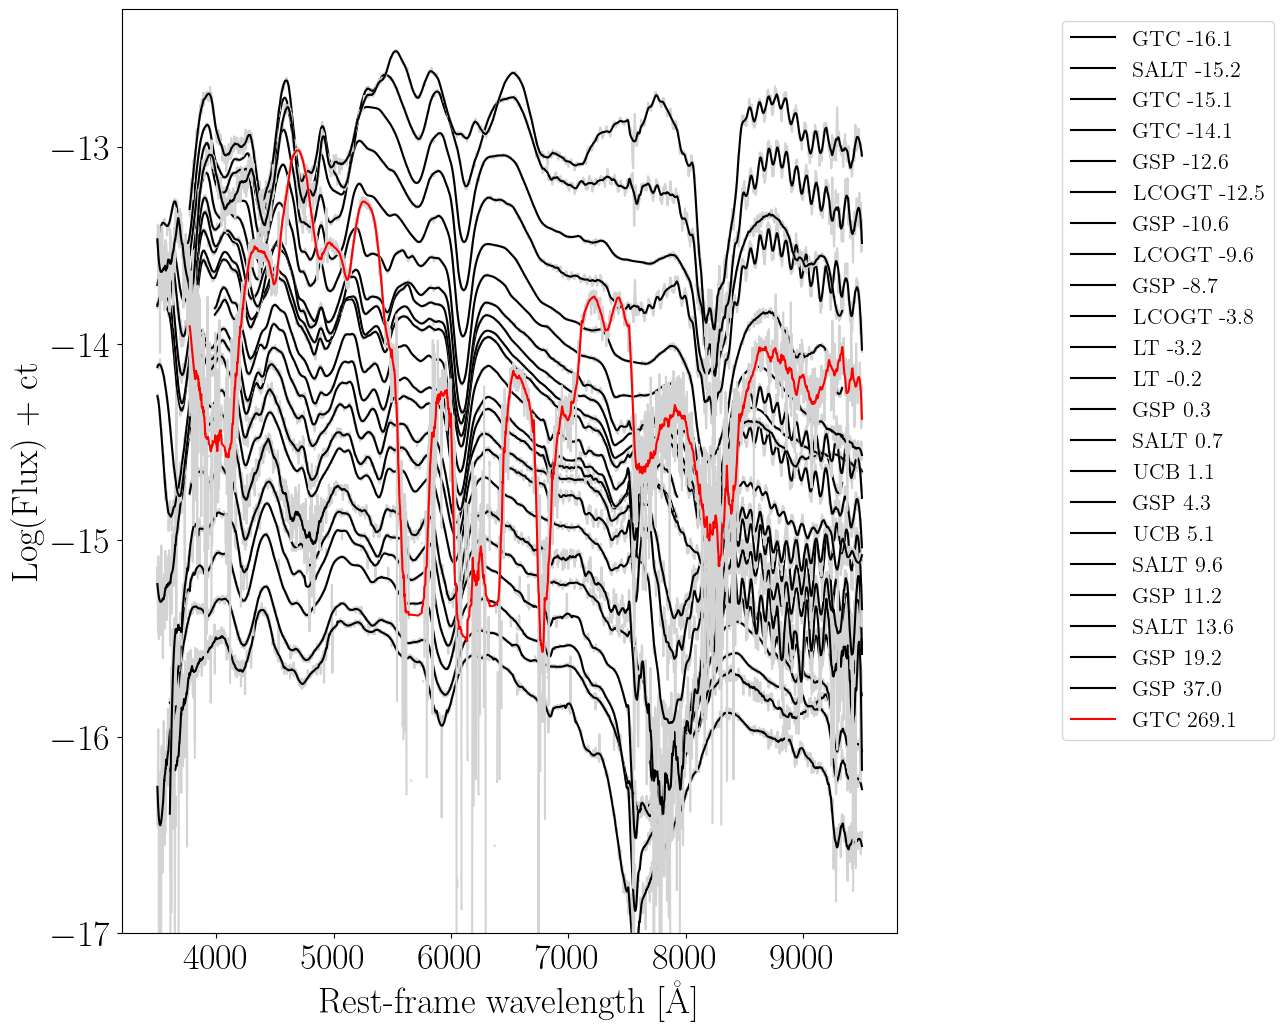

In [53]:
###### TO DO
## the idea is to spatially put the spectra with a constant that is dependent on the epoch.

y1    =np.log10(sp1res    )
y2    =np.log10(sp2res    )+1.45*0.1
y3    =np.log10(sp3res    )+1.45*0.2
y4    =np.log10(sp4res    )+1.45*0.3
y5    =np.log10(sp5res    )+1.45*0.4
y6    =np.log10(sp6res    )+1.45*0.5
y7    =np.log10(sp7res    )+1.45*0.6
y8    =np.log10(sp8res    )+1.45*0.7
y9    =np.log10(sp9res    )+1.45*0.8
y10   =np.log10(sp10res   )+1.45*0.9
y11   =np.log10(sp11res   )+1.45*1.0
y12   =np.log10(sp12res   )+1.45*1.1
y13   =np.log10(sp13res   )+1.45*1.2
y14   =np.log10(sp14res   )+1.45*1.2
y15   =np.log10(sp15res   )+1.45*1.3
y16   =np.log10(sp16res   )+1.45*1.4
y17   =np.log10(sp17res   )+1.45*1.5
y18   =np.log10(sp18res   )+1.45*1.6
y19   =np.log10(sp19res   )+1.45*1.7
y20   =np.log10(sp20res   )+1.45*1.8
y21   =np.log10(sp21res   )+1.45*1.9
y22   =np.log10(sp22res   )+1.45*2.0
y23   =np.log10(sp23res   )+1.45*2.1


fig,ax=plt.subplots(1,1,figsize=(10,12))

plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[0])  ) 

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[1]) )   

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[2])  )  

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f}'.format(ep[3]) )   

plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[4])  )  

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f}'.format(ep[5])  )  

plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[6]) )   

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f}'.format(ep[7])  )  

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[8]) )   

plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f}'.format(ep[9])  )  

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT {:4.1f}'.format(ep[10])  )  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT {:4.1f}'.format(ep[11])  )  

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[12]) )   

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[13])  )  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB {:4.1f}'.format(ep[14]) )

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[15]) )

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB {:4.1f}'.format(ep[16]) )

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[17]) )

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[18]) )

plt.plot(x,y20,c='lightgrey') 
sx,sy = x[np.isfinite(y20)],savgol_filter(y20[np.isfinite(y20)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f}'.format(ep[19]) )

plt.plot(x,y21,c='lightgrey') 
sx,sy = x[np.isfinite(y21)],savgol_filter(y21[np.isfinite(y21)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP  {:4.1f}'.format(ep[20]) )

plt.plot(x,y22,c='lightgrey') 
sx,sy = x[np.isfinite(y22)],savgol_filter(y22[np.isfinite(y22)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[21]))

plt.plot(x,y23,c='lightgrey') 
sx,sy = x[np.isfinite(y23)],savgol_filter(y23[np.isfinite(y23)], 91, 3)
plt.plot(sx,sy,color='red',label='GTC {:4.1f}'.format(ep[22]))

#plt.text(9000,-12.9, "Max", ha="left", va="center", size=20,color='red')
#plt.text(8200,-13.0, "(for maximum, not Stritzinger)", ha="left", va="center", size=9,color='red')
#plt.plot([8900,8100],[-12.9,-12.9],color='red')




plt.ylabel(r'Log(Flux) + ct')
plt.xlabel(r'Rest-frame wavelength [\AA]')
plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-17.,-12.3)
plt.legend(loc=1, bbox_to_anchor=(1., 0.5, 0.5, 0.5),fontsize=16)
plt.savefig('Opt_log.pdf',format='pdf', bbox_inches="tight")
plt.show() 



In [ ]:
###### TO DO
## the idea is to spatially put the spectra with a constant that is dependent on the epoch.

y1    =np.log10(sp1res    )
y2    =np.log10(sp2res    )+1.45*0.3
y3    =np.log10(sp3res    )+1.45*0.6
y4    =np.log10(sp4res    )+1.45*0.9
y5    =np.log10(sp5res    )+1.45*1.2
y6    =np.log10(sp6res    )+1.45*1.5
y7    =np.log10(sp7res    )+1.45*1.8
y8    =np.log10(sp8res    )+1.45*2.1
y9    =np.log10(sp9res    )+1.45*2.4
y10   =np.log10(sp10res   )+1.45*2.7
y11   =np.log10(sp11res   )+1.45*3.0
y12   =np.log10(sp12res   )+1.45*3.3
y13   =np.log10(sp13res   )+1.45*3.6
y14   =np.log10(sp14res   )+1.45*3.9
y15   =np.log10(sp15res   )+1.45*4.2
y16   =np.log10(sp16res   )+1.45*4.5
y17   =np.log10(sp17res   )+1.45*4.8
y18   =np.log10(sp18res   )+1.45*5.1
y19   =np.log10(sp19res   )+1.45*5.4
y20   =np.log10(sp20res   )+1.45*5.7
y21   =np.log10(sp21res   )+1.45*6.0
y22   =np.log10(sp22res   )+1.45*6.3


fig,ax=plt.subplots(1,1,figsize=(10,12))


plt.plot(x,y1,c='lightgrey',zorder=-10)
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f} d'.format(ep[0]))

plt.plot(x,y2,c='lightgrey',zorder=-10)     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f} d'.format(ep[1]))

plt.plot(x,y3,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f} d'.format(ep[2]))

plt.plot(x,y4,c='lightgrey',zorder=-10)  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC {:4.1f} d'.format(ep[3]))

plt.plot(x,y5,c='lightgrey',zorder=-10)  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f} d'.format(ep[4]))

plt.plot(x,y6,c='lightgrey',zorder=-10)
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[5]))

plt.plot(x,y7,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[6]))

plt.plot(x,y8,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f} d'.format(ep[7]))

plt.plot(x,y9,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[8]))

plt.plot(x,y10,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT {:4.1f} d'.format(ep[9]))

plt.plot(x,y11,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT {:4.1f} d'.format(ep[10]))

plt.plot(x,y12,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT {:4.1f} d'.format(ep[11]))

plt.plot(x,y13,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[12]))

plt.plot(x,y14,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[13]))

plt.plot(x,y15,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB {:4.1f} d'.format(ep[14]))

plt.plot(x,y16,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[15]))

plt.plot(x,y17,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB {:4.1f} d'.format(ep[16]))

plt.plot(x,y18,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f} d'.format(ep[17]))

plt.plot(x,y19,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f} d'.format(ep[18]))

plt.plot(x,y20,c='lightgrey',zorder=-10) 
sx,sy = x[np.isfinite(y20)],savgol_filter(y20[np.isfinite(y20)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT {:4.1f} d'.format(ep[19]))

plt.plot(x,y21,c='lightgrey') 
sx,sy = x[np.isfinite(y21)],savgol_filter(y21[np.isfinite(y21)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[20]) )

plt.plot(x,y22,c='lightgrey') 
sx,sy = x[np.isfinite(y22)],savgol_filter(y22[np.isfinite(y22)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP {:4.1f}'.format(ep[21]) )

ax.text(7650/(1+z20jgl),-7.1,r'$\oplus$',color='black', fontsize=22, horizontalalignment='center')
ax.text(6895/(1+z20jgl),-7.1,r'$\oplus$',color='black', fontsize=22, horizontalalignment='center')
#ax.text(13800/(1+z17fzw),-14.1,r'$\oplus$',color='black', fontsize=22, horizontalalignment='center')
#ax.text(18700/(1+z17fzw),-14.1,r'$\oplus$',color='black', fontsize=22, horizontalalignment='center')


plt.ylabel(r'Log(Flux) + ct')
plt.xlabel(r'Rest-frame wavelength [\AA]')
plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-17.5,-5.5)
plt.legend(loc=1, bbox_to_anchor=(0.85, 0.5, 0.5, 0.5),fontsize=16)
plt.savefig('Opt_log.pdf',format='pdf', bbox_inches="tight")
plt.show() 



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


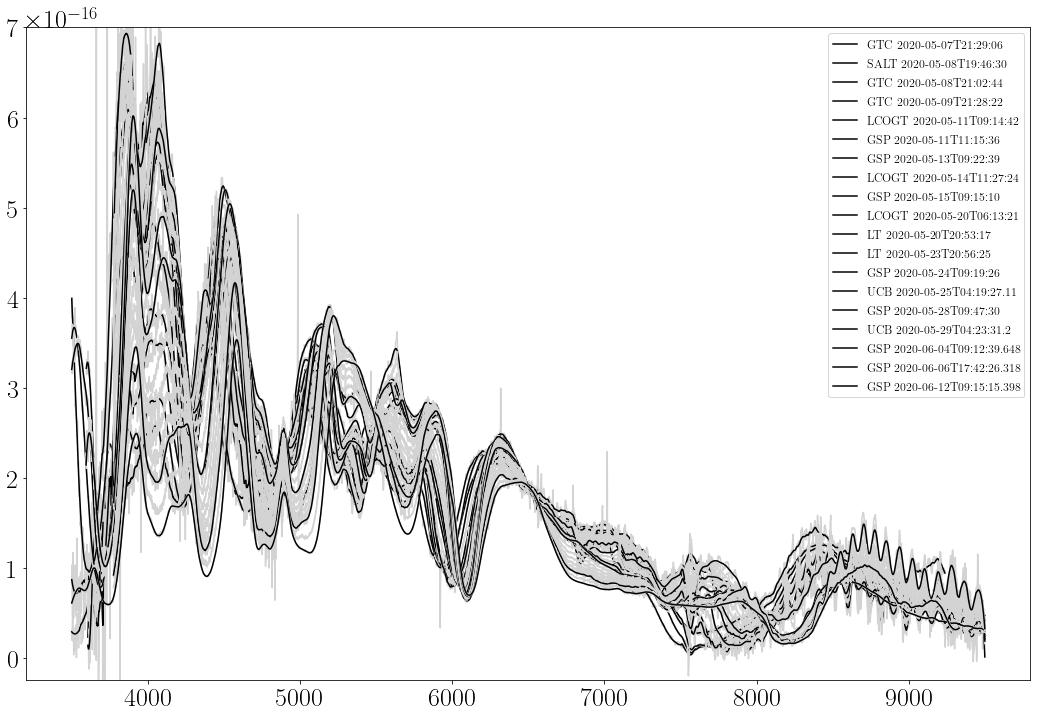

In [77]:
lref=6500
ref=sp1res[x==lref][0]

y1    = sp1res
y2    = sp2res     / sp2res    [x==lref]*ref 
y3    = sp3res     / sp3res    [x==lref]*ref 
y4    = sp4res     / sp4res    [x==lref]*ref 
y45   = sp45res    / sp45res   [x==lref]*ref 
y5    = sp5res     / sp5res    [x==lref]*ref 
y6    = sp6res     / sp6res    [x==lref]*ref 
y67   = sp67res    / sp67res   [x==lref]*ref 
y7    = sp7res     / sp7res    [x==lref]*ref 
y8    = sp8res     / sp8res    [x==lref]*ref 
y9    = sp9res     / sp9res    [x==lref]*ref 
y9101 = sp9101res  / sp9101res [x==lref]*ref 
y9102 = sp9102res  / sp9102res [x==lref]*ref 
y9103 = sp9103res  / sp9103res [x==lref]*ref 
y9104 = sp9104res  / sp9104res [x==lref]*ref 
y10   = sp10res    / sp10res   [x==lref]*ref 
y11   = sp11res    / sp11res   [x==lref]*ref 
y11121= sp11121res / sp11121res[x==lref]*ref 
y11122= sp11122res / sp11122res[x==lref]*ref 
y12   = sp12res    / sp12res   [x==lref]*ref 
y13   = sp13res    / sp13res   [x==lref]*ref 
y14   = sp14res    / sp14res   [x==lref]*ref 
y14151= sp14151res / sp14151res[x==lref]*ref 
y14152= sp14152res / sp14152res[x==lref]*ref 
y15   = sp15res    / sp15res   [x==lref]*ref 
y16   = sp16res    / sp16res   [x==lref]*ref 
y16171= sp16171res / sp16171res[x==lref]*ref 
y16172= sp16172res / sp16172res[x==lref]*ref 
y16173= sp16173res / sp16173res[x==lref]*ref 
y16174= sp16174res / sp16174res[x==lref]*ref 
y16175= sp16175res / sp16175res[x==lref]*ref 
y17   = sp17res    / sp17res   [x==lref]*ref 
y1718 = sp1718res  / sp1718res [x==lref]*ref 
y18   = sp18res    / sp18res   [x==lref]*ref 

fig,ax=plt.subplots(1,1,figsize=(18,12))

plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-07T21:29:06',zorder=2)   

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT  2020-05-08T19:46:30',zorder=2)    

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-08T21:02:44',zorder=2)    

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-09T21:28:22',zorder=2)    


plt.plot(x,y45,c='lightgrey')  
sx,sy = x[np.isfinite(y45)],savgol_filter(y45[np.isfinite(y45)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew45.fits)    


plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-11T09:14:42',zorder=2)    

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-11T11:15:36',zorder=2)    


plt.plot(x,y67,c='lightgrey')  
sx,sy = x[np.isfinite(y67)],savgol_filter(y67[np.isfinite(y67)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew67.fits)    


plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-13T09:22:39',zorder=2)    

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-14T11:27:24',zorder=2)    

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-15T09:15:10',zorder=2)    


plt.plot(x,y9101,c='lightgrey')  
sx,sy = x[np.isfinite(y9101)],savgol_filter(y9101[np.isfinite(y9101)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew9101.fits)    
plt.plot(x,y9102,c='lightgrey')  
sx,sy = x[np.isfinite(y9102)],savgol_filter(y9102[np.isfinite(y9102)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9102.fits)  
plt.plot(x,y9103,c='lightgrey')  
sx,sy = x[np.isfinite(y9103)],savgol_filter(y9103[np.isfinite(y9103)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9103.fits)  
plt.plot(x,y9104,c='lightgrey')  
sx,sy = x[np.isfinite(y9104)],savgol_filter(y9104[np.isfinite(y9104)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9104.fits)  


plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-20T06:13:21',zorder=2)    

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT    2020-05-20T20:53:17',zorder=2)    


plt.plot(x,y11121,c='lightgrey')  
sx,sy = x[np.isfinite(y11121)],savgol_filter(y11121[np.isfinite(y11121)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11121.fits)    
plt.plot(x,y11122,c='lightgrey')  
sx,sy = x[np.isfinite(y11122)],savgol_filter(y11122[np.isfinite(y11122)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11122.fits)  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT    2020-05-23T20:56:25',zorder=2)    

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-24T09:19:26',zorder=2)    

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-25T04:19:27.11',zorder=2)    


plt.plot(x,y14151,c='lightgrey')  
sx,sy = x[np.isfinite(y14151)],savgol_filter(y14151[np.isfinite(y14151)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y14152,c='lightgrey')  
sx,sy = x[np.isfinite(y14152)],savgol_filter(y14152[np.isfinite(y14152)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-28T09:47:30',zorder=2) 

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-29T04:23:31.2',zorder=2) 


plt.plot(x,y16171,c='lightgrey')  
sx,sy = x[np.isfinite(y16171)],savgol_filter(y16171[np.isfinite(y16171)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16172,c='lightgrey')  
sx,sy = x[np.isfinite(y16172)],savgol_filter(y16172[np.isfinite(y16172)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16173,c='lightgrey')  
sx,sy = x[np.isfinite(y16173)],savgol_filter(y16173[np.isfinite(y16173)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16174,c='lightgrey')  
sx,sy = x[np.isfinite(y16174)],savgol_filter(y16174[np.isfinite(y16174)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16175,c='lightgrey')  
sx,sy = x[np.isfinite(y16175)],savgol_filter(y16175[np.isfinite(y16175)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-04T09:12:39.648',zorder=2) 

plt.plot(x,y1718,c='lightgrey') 
sx,sy = x[np.isfinite(y1718)],savgol_filter(y1718[np.isfinite(y1718)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-06T17:42:26.318',zorder=2) 


plt.plot(x,y18191,c='lightgrey')  
sx,sy = x[np.isfinite(y18191)],savgol_filter(y18191[np.isfinite(y18191)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18192,c='lightgrey')  
sx,sy = x[np.isfinite(y18192)],savgol_filter(y18192[np.isfinite(y18192)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18193,c='lightgrey')  
sx,sy = x[np.isfinite(y18193)],savgol_filter(y18193[np.isfinite(y18193)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18194,c='lightgrey')  
sx,sy = x[np.isfinite(y18194)],savgol_filter(y18194[np.isfinite(y18194)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18195,c='lightgrey')  
sx,sy = x[np.isfinite(y18195)],savgol_filter(y18195[np.isfinite(y18195)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-12T09:15:15.398') 
plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-2.4e-17,0.7e-15)
plt.legend(loc=1,fontsize=12)
plt.savefig('All.eps',format='eps')
plt.show() 

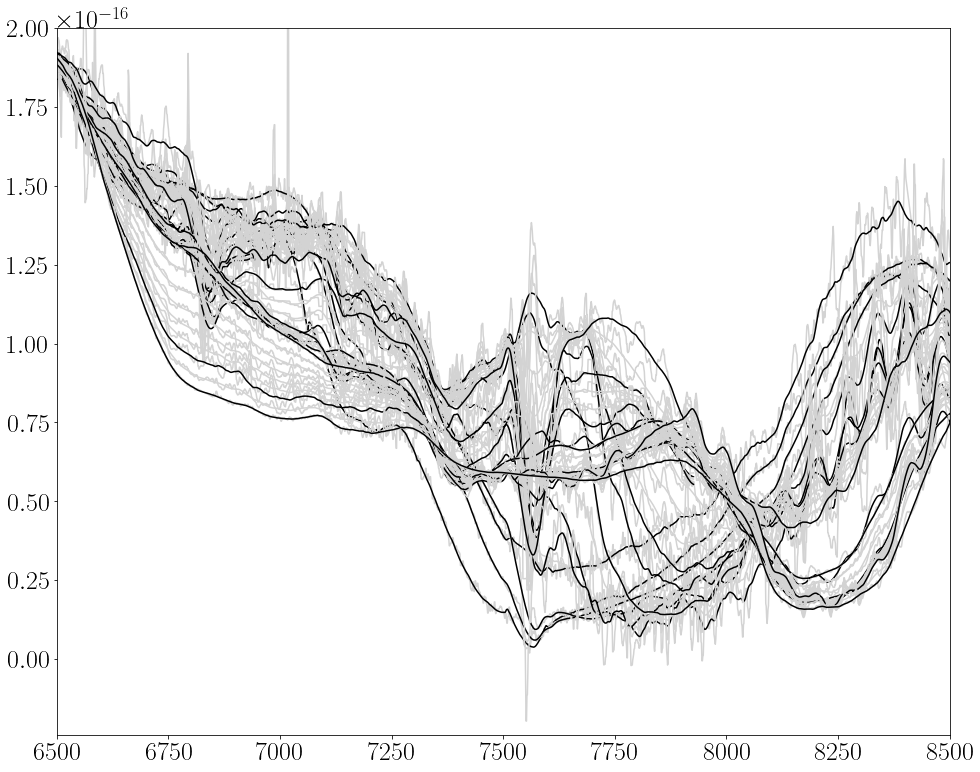

In [78]:
fig,ax=plt.subplots(1,1,figsize=(16,13))


plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-07T21:29:06',zorder=2)   

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT  2020-05-08T19:46:30',zorder=2)    

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-08T21:02:44',zorder=2)    

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-09T21:28:22',zorder=2)    


plt.plot(x,y45,c='lightgrey')  
sx,sy = x[np.isfinite(y45)],savgol_filter(y45[np.isfinite(y45)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew45.fits)    


plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-11T09:14:42',zorder=2)    

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-11T11:15:36',zorder=2)    


plt.plot(x,y67,c='lightgrey')  
sx,sy = x[np.isfinite(y67)],savgol_filter(y67[np.isfinite(y67)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew67.fits)    


plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-13T09:22:39',zorder=2)    

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-14T11:27:24',zorder=2)    

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-15T09:15:10',zorder=2)    


plt.plot(x,y9101,c='lightgrey')  
sx,sy = x[np.isfinite(y9101)],savgol_filter(y9101[np.isfinite(y9101)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew9101.fits)    
plt.plot(x,y9102,c='lightgrey')  
sx,sy = x[np.isfinite(y9102)],savgol_filter(y9102[np.isfinite(y9102)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9102.fits)  
plt.plot(x,y9103,c='lightgrey')  
sx,sy = x[np.isfinite(y9103)],savgol_filter(y9103[np.isfinite(y9103)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9103.fits)  
plt.plot(x,y9104,c='lightgrey')  
sx,sy = x[np.isfinite(y9104)],savgol_filter(y9104[np.isfinite(y9104)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9104.fits)  


plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-20T06:13:21',zorder=2)    

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT    2020-05-20T20:53:17',zorder=2)    


plt.plot(x,y11121,c='lightgrey')  
sx,sy = x[np.isfinite(y11121)],savgol_filter(y11121[np.isfinite(y11121)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11121.fits)    
plt.plot(x,y11122,c='lightgrey')  
sx,sy = x[np.isfinite(y11122)],savgol_filter(y11122[np.isfinite(y11122)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11122.fits)  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT    2020-05-23T20:56:25',zorder=2)    

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-24T09:19:26',zorder=2)    

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-25T04:19:27.11',zorder=2)    


plt.plot(x,y14151,c='lightgrey')  
sx,sy = x[np.isfinite(y14151)],savgol_filter(y14151[np.isfinite(y14151)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y14152,c='lightgrey')  
sx,sy = x[np.isfinite(y14152)],savgol_filter(y14152[np.isfinite(y14152)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-28T09:47:30',zorder=2) 

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-29T04:23:31.2',zorder=2) 


plt.plot(x,y16171,c='lightgrey')  
sx,sy = x[np.isfinite(y16171)],savgol_filter(y16171[np.isfinite(y16171)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16172,c='lightgrey')  
sx,sy = x[np.isfinite(y16172)],savgol_filter(y16172[np.isfinite(y16172)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16173,c='lightgrey')  
sx,sy = x[np.isfinite(y16173)],savgol_filter(y16173[np.isfinite(y16173)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16174,c='lightgrey')  
sx,sy = x[np.isfinite(y16174)],savgol_filter(y16174[np.isfinite(y16174)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16175,c='lightgrey')  
sx,sy = x[np.isfinite(y16175)],savgol_filter(y16175[np.isfinite(y16175)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-04T09:12:39.648',zorder=2) 

plt.plot(x,y1718,c='lightgrey') 
sx,sy = x[np.isfinite(y1718)],savgol_filter(y1718[np.isfinite(y1718)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-06T17:42:26.318',zorder=2) 


plt.plot(x,y18191,c='lightgrey')  
sx,sy = x[np.isfinite(y18191)],savgol_filter(y18191[np.isfinite(y18191)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18192,c='lightgrey')  
sx,sy = x[np.isfinite(y18192)],savgol_filter(y18192[np.isfinite(y18192)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18193,c='lightgrey')  
sx,sy = x[np.isfinite(y18193)],savgol_filter(y18193[np.isfinite(y18193)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18194,c='lightgrey')  
sx,sy = x[np.isfinite(y18194)],savgol_filter(y18194[np.isfinite(y18194)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18195,c='lightgrey')  
sx,sy = x[np.isfinite(y18195)],savgol_filter(y18195[np.isfinite(y18195)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-12T09:15:15.398') 

plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-2.4e-17,0.2e-15)
plt.xlim(6500,8500)
#plt.legend(loc=3)
plt.savefig('CaII.eps',format='eps')
plt.show() 

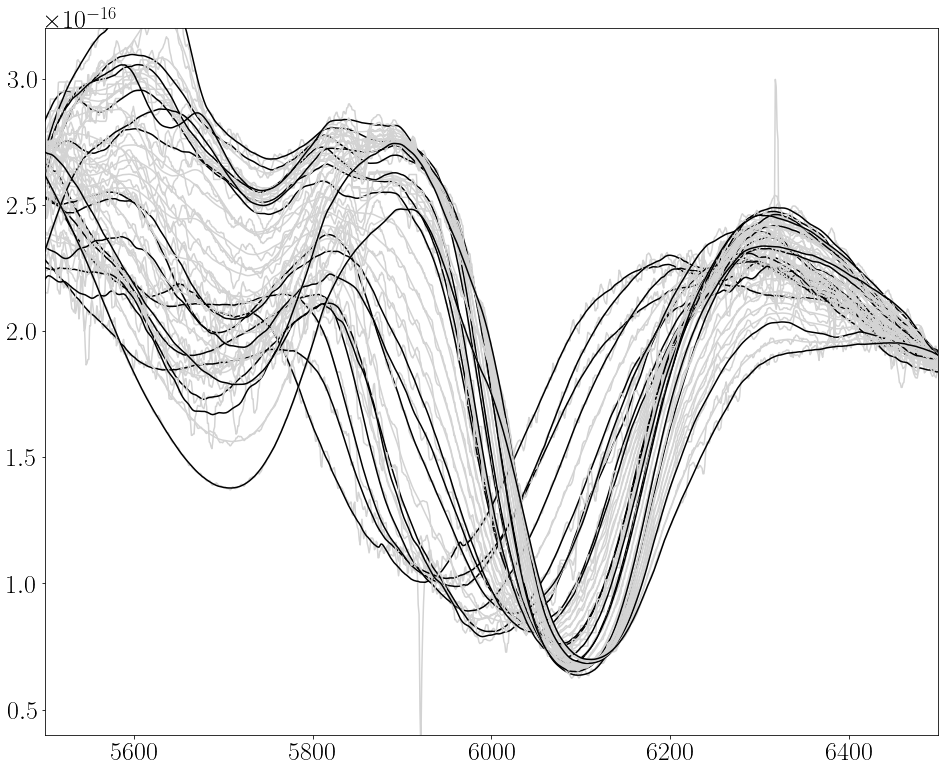

In [79]:
fig,ax=plt.subplots(1,1,figsize=(16,13))


plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-07T21:29:06',zorder=2)   

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT  2020-05-08T19:46:30',zorder=2)    

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-08T21:02:44',zorder=2)    

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-09T21:28:22',zorder=2)    


plt.plot(x,y45,c='lightgrey')  
sx,sy = x[np.isfinite(y45)],savgol_filter(y45[np.isfinite(y45)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew45.fits)    


plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-11T09:14:42',zorder=2)    

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-11T11:15:36',zorder=2)    


plt.plot(x,y67,c='lightgrey')  
sx,sy = x[np.isfinite(y67)],savgol_filter(y67[np.isfinite(y67)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew67.fits)    


plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-13T09:22:39',zorder=2)    

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-14T11:27:24',zorder=2)    

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-15T09:15:10',zorder=2)    


plt.plot(x,y9101,c='lightgrey')  
sx,sy = x[np.isfinite(y9101)],savgol_filter(y9101[np.isfinite(y9101)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew9101.fits)    
plt.plot(x,y9102,c='lightgrey')  
sx,sy = x[np.isfinite(y9102)],savgol_filter(y9102[np.isfinite(y9102)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9102.fits)  
plt.plot(x,y9103,c='lightgrey')  
sx,sy = x[np.isfinite(y9103)],savgol_filter(y9103[np.isfinite(y9103)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9103.fits)  
plt.plot(x,y9104,c='lightgrey')  
sx,sy = x[np.isfinite(y9104)],savgol_filter(y9104[np.isfinite(y9104)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9104.fits)  


plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-20T06:13:21',zorder=2)    

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT    2020-05-20T20:53:17',zorder=2)    


plt.plot(x,y11121,c='lightgrey')  
sx,sy = x[np.isfinite(y11121)],savgol_filter(y11121[np.isfinite(y11121)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11121.fits)    
plt.plot(x,y11122,c='lightgrey')  
sx,sy = x[np.isfinite(y11122)],savgol_filter(y11122[np.isfinite(y11122)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11122.fits)  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT    2020-05-23T20:56:25',zorder=2)    

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-24T09:19:26',zorder=2)    

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-25T04:19:27.11',zorder=2)    


plt.plot(x,y14151,c='lightgrey')  
sx,sy = x[np.isfinite(y14151)],savgol_filter(y14151[np.isfinite(y14151)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y14152,c='lightgrey')  
sx,sy = x[np.isfinite(y14152)],savgol_filter(y14152[np.isfinite(y14152)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-28T09:47:30',zorder=2) 

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-29T04:23:31.2',zorder=2) 


plt.plot(x,y16171,c='lightgrey')  
sx,sy = x[np.isfinite(y16171)],savgol_filter(y16171[np.isfinite(y16171)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16172,c='lightgrey')  
sx,sy = x[np.isfinite(y16172)],savgol_filter(y16172[np.isfinite(y16172)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16173,c='lightgrey')  
sx,sy = x[np.isfinite(y16173)],savgol_filter(y16173[np.isfinite(y16173)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16174,c='lightgrey')  
sx,sy = x[np.isfinite(y16174)],savgol_filter(y16174[np.isfinite(y16174)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16175,c='lightgrey')  
sx,sy = x[np.isfinite(y16175)],savgol_filter(y16175[np.isfinite(y16175)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-04T09:12:39.648',zorder=2) 

plt.plot(x,y1718,c='lightgrey') 
sx,sy = x[np.isfinite(y1718)],savgol_filter(y1718[np.isfinite(y1718)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-06T17:42:26.318',zorder=2) 



plt.plot(x,y18191,c='lightgrey')  
sx,sy = x[np.isfinite(y18191)],savgol_filter(y18191[np.isfinite(y18191)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18192,c='lightgrey')  
sx,sy = x[np.isfinite(y18192)],savgol_filter(y18192[np.isfinite(y18192)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18193,c='lightgrey')  
sx,sy = x[np.isfinite(y18193)],savgol_filter(y18193[np.isfinite(y18193)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18194,c='lightgrey')  
sx,sy = x[np.isfinite(y18194)],savgol_filter(y18194[np.isfinite(y18194)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18195,c='lightgrey')  
sx,sy = x[np.isfinite(y18195)],savgol_filter(y18195[np.isfinite(y18195)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-12T09:15:15.398') 
plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(0.4e-16,0.32e-15)
plt.xlim(5500,6500)
#plt.legend(loc=3)
plt.savefig('SiII.eps',format='eps')
plt.show() 

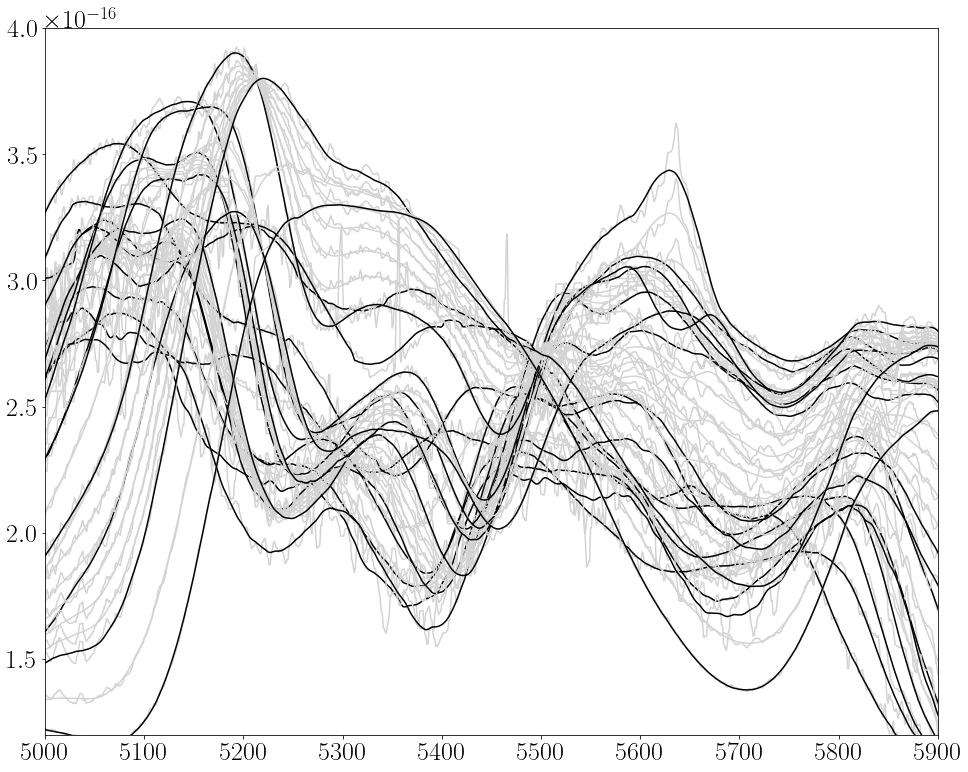

In [80]:
fig,ax=plt.subplots(1,1,figsize=(16,13))


plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-07T21:29:06',zorder=2)   

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT  2020-05-08T19:46:30',zorder=2)    

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-08T21:02:44',zorder=2)    

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-09T21:28:22',zorder=2)    


plt.plot(x,y45,c='lightgrey')  
sx,sy = x[np.isfinite(y45)],savgol_filter(y45[np.isfinite(y45)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew45.fits)    


plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-11T09:14:42',zorder=2)    

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-11T11:15:36',zorder=2)    


plt.plot(x,y67,c='lightgrey')  
sx,sy = x[np.isfinite(y67)],savgol_filter(y67[np.isfinite(y67)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew67.fits)    


plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-13T09:22:39',zorder=2)    

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-14T11:27:24',zorder=2)    

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-15T09:15:10',zorder=2)    


plt.plot(x,y9101,c='lightgrey')  
sx,sy = x[np.isfinite(y9101)],savgol_filter(y9101[np.isfinite(y9101)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew9101.fits)    
plt.plot(x,y9102,c='lightgrey')  
sx,sy = x[np.isfinite(y9102)],savgol_filter(y9102[np.isfinite(y9102)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9102.fits)  
plt.plot(x,y9103,c='lightgrey')  
sx,sy = x[np.isfinite(y9103)],savgol_filter(y9103[np.isfinite(y9103)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9103.fits)  
plt.plot(x,y9104,c='lightgrey')  
sx,sy = x[np.isfinite(y9104)],savgol_filter(y9104[np.isfinite(y9104)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9104.fits)  


plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-20T06:13:21',zorder=2)    

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT    2020-05-20T20:53:17',zorder=2)    


plt.plot(x,y11121,c='lightgrey')  
sx,sy = x[np.isfinite(y11121)],savgol_filter(y11121[np.isfinite(y11121)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11121.fits)    
plt.plot(x,y11122,c='lightgrey')  
sx,sy = x[np.isfinite(y11122)],savgol_filter(y11122[np.isfinite(y11122)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11122.fits)  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT    2020-05-23T20:56:25',zorder=2)    

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-24T09:19:26',zorder=2)    

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-25T04:19:27.11',zorder=2)    


plt.plot(x,y14151,c='lightgrey')  
sx,sy = x[np.isfinite(y14151)],savgol_filter(y14151[np.isfinite(y14151)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y14152,c='lightgrey')  
sx,sy = x[np.isfinite(y14152)],savgol_filter(y14152[np.isfinite(y14152)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-28T09:47:30',zorder=2) 

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-29T04:23:31.2',zorder=2) 


plt.plot(x,y16171,c='lightgrey')  
sx,sy = x[np.isfinite(y16171)],savgol_filter(y16171[np.isfinite(y16171)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16172,c='lightgrey')  
sx,sy = x[np.isfinite(y16172)],savgol_filter(y16172[np.isfinite(y16172)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16173,c='lightgrey')  
sx,sy = x[np.isfinite(y16173)],savgol_filter(y16173[np.isfinite(y16173)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16174,c='lightgrey')  
sx,sy = x[np.isfinite(y16174)],savgol_filter(y16174[np.isfinite(y16174)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16175,c='lightgrey')  
sx,sy = x[np.isfinite(y16175)],savgol_filter(y16175[np.isfinite(y16175)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-04T09:12:39.648',zorder=2) 

plt.plot(x,y1718,c='lightgrey') 
sx,sy = x[np.isfinite(y1718)],savgol_filter(y1718[np.isfinite(y1718)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-06T17:42:26.318',zorder=2) 



plt.plot(x,y18191,c='lightgrey')  
sx,sy = x[np.isfinite(y18191)],savgol_filter(y18191[np.isfinite(y18191)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18192,c='lightgrey')  
sx,sy = x[np.isfinite(y18192)],savgol_filter(y18192[np.isfinite(y18192)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18193,c='lightgrey')  
sx,sy = x[np.isfinite(y18193)],savgol_filter(y18193[np.isfinite(y18193)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18194,c='lightgrey')  
sx,sy = x[np.isfinite(y18194)],savgol_filter(y18194[np.isfinite(y18194)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18195,c='lightgrey')  
sx,sy = x[np.isfinite(y18195)],savgol_filter(y18195[np.isfinite(y18195)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-12T09:15:15.398') 

plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(1.2e-16,4.0e-16)
plt.xlim(5000,5900)
#plt.legend(loc=3)
plt.savefig('SII.eps',format='eps')
plt.show() 

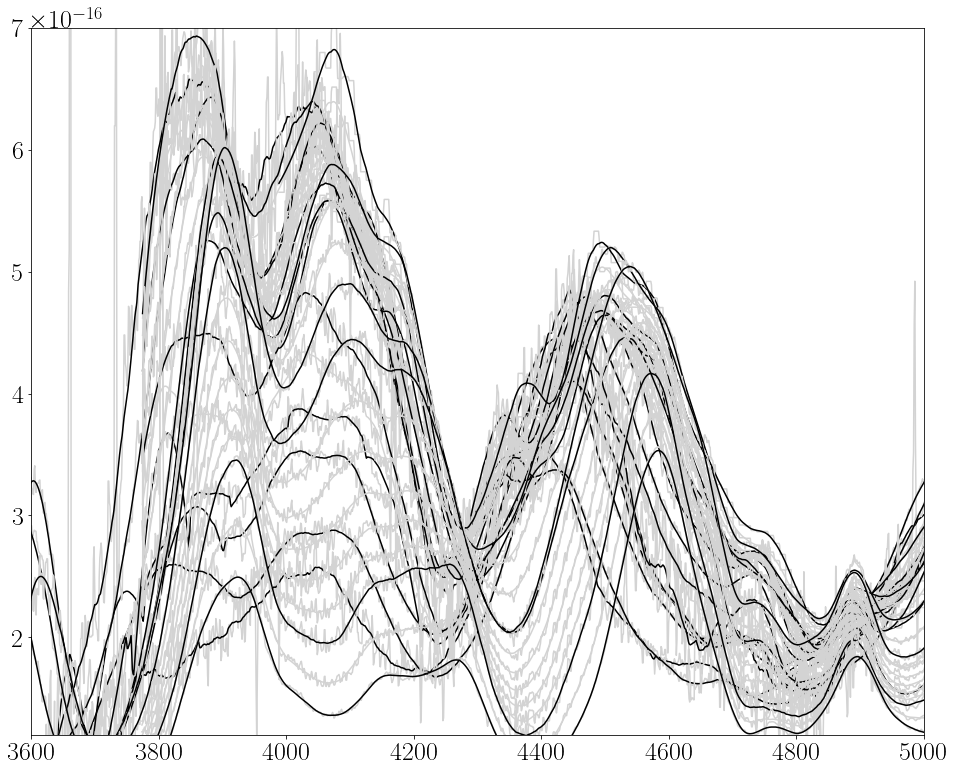

In [81]:
fig,ax=plt.subplots(1,1,figsize=(16,13))


plt.plot(x,y1,c='lightgrey')
sx,sy = x[np.isfinite(y1)],savgol_filter(y1[np.isfinite(y1)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-07T21:29:06',zorder=2)   

plt.plot(x,y2,c='lightgrey')     
sx,sy = x[np.isfinite(y2)],savgol_filter(y2[np.isfinite(y2)], 91, 3)
plt.plot(sx,sy,color='black',label='SALT  2020-05-08T19:46:30',zorder=2)    

plt.plot(x,y3,c='lightgrey') 
sx,sy = x[np.isfinite(y3)],savgol_filter(y3[np.isfinite(y3)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-08T21:02:44',zorder=2)    

plt.plot(x,y4,c='lightgrey')  
sx,sy = x[np.isfinite(y4)],savgol_filter(y4[np.isfinite(y4)], 91, 3)
plt.plot(sx,sy,color='black',label='GTC   2020-05-09T21:28:22',zorder=2)    


plt.plot(x,y45,c='lightgrey')  
sx,sy = x[np.isfinite(y45)],savgol_filter(y45[np.isfinite(y45)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew45.fits)    


plt.plot(x,y5,c='lightgrey')  
sx,sy = x[np.isfinite(y5)],savgol_filter(y5[np.isfinite(y5)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-11T09:14:42',zorder=2)    

plt.plot(x,y6,c='lightgrey')
sx,sy = x[np.isfinite(y6)],savgol_filter(y6[np.isfinite(y6)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-11T11:15:36',zorder=2)    


plt.plot(x,y67,c='lightgrey')  
sx,sy = x[np.isfinite(y67)],savgol_filter(y67[np.isfinite(y67)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew67.fits)    


plt.plot(x,y7,c='lightgrey') 
sx,sy = x[np.isfinite(y7)],savgol_filter(y7[np.isfinite(y7)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-13T09:22:39',zorder=2)    

plt.plot(x,y8,c='lightgrey') 
sx,sy = x[np.isfinite(y8)],savgol_filter(y8[np.isfinite(y8)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-14T11:27:24',zorder=2)    

plt.plot(x,y9,c='lightgrey') 
sx,sy = x[np.isfinite(y9)],savgol_filter(y9[np.isfinite(y9)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-15T09:15:10',zorder=2)    


plt.plot(x,y9101,c='lightgrey')  
sx,sy = x[np.isfinite(y9101)],savgol_filter(y9101[np.isfinite(y9101)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew9101.fits)    
plt.plot(x,y9102,c='lightgrey')  
sx,sy = x[np.isfinite(y9102)],savgol_filter(y9102[np.isfinite(y9102)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9102.fits)  
plt.plot(x,y9103,c='lightgrey')  
sx,sy = x[np.isfinite(y9103)],savgol_filter(y9103[np.isfinite(y9103)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9103.fits)  
plt.plot(x,y9104,c='lightgrey')  
sx,sy = x[np.isfinite(y9104)],savgol_filter(y9104[np.isfinite(y9104)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew9104.fits)  


plt.plot(x,y10,c='lightgrey') 
sx,sy = x[np.isfinite(y10)],savgol_filter(y10[np.isfinite(y10)], 91, 3)
plt.plot(sx,sy,color='black',label='LCOGT 2020-05-20T06:13:21',zorder=2)    

plt.plot(x,y11,c='lightgrey') 
sx,sy = x[np.isfinite(y11)],savgol_filter(y11[np.isfinite(y11)], 91, 3)
plt.plot(sx,sy,color='black' ,label='LT    2020-05-20T20:53:17',zorder=2)    


plt.plot(x,y11121,c='lightgrey')  
sx,sy = x[np.isfinite(y11121)],savgol_filter(y11121[np.isfinite(y11121)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11121.fits)    
plt.plot(x,y11122,c='lightgrey')  
sx,sy = x[np.isfinite(y11122)],savgol_filter(y11122[np.isfinite(y11122)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew11122.fits)  

plt.plot(x,y12,c='lightgrey') 
sx,sy = x[np.isfinite(y12)],savgol_filter(y12[np.isfinite(y12)], 91, 3)
plt.plot(sx,sy,color='black',label='LT    2020-05-23T20:56:25',zorder=2)    

plt.plot(x,y13,c='lightgrey') 
sx,sy = x[np.isfinite(y13)],savgol_filter(y13[np.isfinite(y13)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-24T09:19:26',zorder=2)    

plt.plot(x,y14,c='lightgrey') 
sx,sy = x[np.isfinite(y14)],savgol_filter(y14[np.isfinite(y14)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-25T04:19:27.11',zorder=2)    


plt.plot(x,y14151,c='lightgrey')  
sx,sy = x[np.isfinite(y14151)],savgol_filter(y14151[np.isfinite(y14151)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y14152,c='lightgrey')  
sx,sy = x[np.isfinite(y14152)],savgol_filter(y14152[np.isfinite(y14152)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y15,c='lightgrey') 
sx,sy = x[np.isfinite(y15)],savgol_filter(y15[np.isfinite(y15)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-05-28T09:47:30',zorder=2) 

plt.plot(x,y16,c='lightgrey') 
sx,sy = x[np.isfinite(y16)],savgol_filter(y16[np.isfinite(y16)], 91, 3)
plt.plot(sx,sy,color='black',label='UCB 2020-05-29T04:23:31.2',zorder=2) 


plt.plot(x,y16171,c='lightgrey')  
sx,sy = x[np.isfinite(y16171)],savgol_filter(y16171[np.isfinite(y16171)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16172,c='lightgrey')  
sx,sy = x[np.isfinite(y16172)],savgol_filter(y16172[np.isfinite(y16172)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16173,c='lightgrey')  
sx,sy = x[np.isfinite(y16173)],savgol_filter(y16173[np.isfinite(y16173)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y16174,c='lightgrey')  
sx,sy = x[np.isfinite(y16174)],savgol_filter(y16174[np.isfinite(y16174)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y16175,c='lightgrey')  
sx,sy = x[np.isfinite(y16175)],savgol_filter(y16175[np.isfinite(y16175)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y17,c='lightgrey') 
sx,sy = x[np.isfinite(y17)],savgol_filter(y17[np.isfinite(y17)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-04T09:12:39.648',zorder=2) 

plt.plot(x,y1718,c='lightgrey') 
sx,sy = x[np.isfinite(y1718)],savgol_filter(y1718[np.isfinite(y1718)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y18,c='lightgrey') 
sx,sy = x[np.isfinite(y18)],savgol_filter(y18[np.isfinite(y18)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-06T17:42:26.318',zorder=2) 

  
plt.plot(x,y18191,c='lightgrey')  
sx,sy = x[np.isfinite(y18191)],savgol_filter(y18191[np.isfinite(y18191)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18192,c='lightgrey')  
sx,sy = x[np.isfinite(y18192)],savgol_filter(y18192[np.isfinite(y18192)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18193,c='lightgrey')  
sx,sy = x[np.isfinite(y18193)],savgol_filter(y18193[np.isfinite(y18193)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  
plt.plot(x,y18194,c='lightgrey')  
sx,sy = x[np.isfinite(y18194)],savgol_filter(y18194[np.isfinite(y18194)], 91, 3)
plt.plot(sx,sy,color='lightgrey',label='_no_labl_')#synth '+tnew14151.fits)    
plt.plot(x,y18195,c='lightgrey')  
sx,sy = x[np.isfinite(y18195)],savgol_filter(y18195[np.isfinite(y18195)], 91, 3)
plt.plot(sx,sy,color='lightgrey' ,label='_no_labl_')#synth '+tnew14152.fits)  

plt.plot(x,y19,c='lightgrey') 
sx,sy = x[np.isfinite(y19)],savgol_filter(y19[np.isfinite(y19)], 91, 3)
plt.plot(sx,sy,color='black',label='GSP   2020-06-12T09:15:15.398') 

plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(1.2e-16,7.0e-16)
plt.xlim(3600,5000)
#plt.legend(loc=3)
plt.savefig('Fe.eps',format='eps')
plt.show() 

In [93]:
nir1=Table.read('sp/2020jgl_200513.txt', format='ascii', names=('w','f','e','q'))
nir2=Table.read('sp/2020jgl_200524.txt', format='ascii', names=('w','f','e','q'))
nir31=Table.read('sp/sn2020jgl_epoch1_g102_extract1d_025.dat', format='ascii', names=('w','f','e'))
nir32=Table.read('sp/sn2020jgl_epoch1_g141_extract1d_050.dat', format='ascii', names=('w','f','e'))
nir41=Table.read('sp/sn2020jgl_epoch2_g102_extract1d_025.dat', format='ascii', names=('w','f','e'))
nir42=Table.read('sp/sn2020jgl_epoch2_g141_extract1d_050.dat', format='ascii', names=('w','f','e'))

nirt=['2020-05-13T05:23:38.243475','2020-05-24T05:28:14.542008','2020-05-25T03:22:52.34','2020-05-30T05:45:53.33']
nirtt = Time(nirt, format='isot', scale='utc')
nirep=(nirtt.mjd-tmax)/(1.+z20jgl)
print(nirep)

nir1['w'] = nir1['w']/1.006758*1e4
nir2['w'] = nir2['w']/1.006758*1e4
nir31['w'] = nir31['w']/1.006758*1e4
nir32['w'] = nir32['w']/1.006758*1e4
nir41['w'] = nir41['w']/1.006758*1e4
nir42['w'] = nir42['w']/1.006758*1e4

c=29979245800
    
nir1['f'] = nir1['f']*1.006758
nir2['f'] = nir2['f']*1.006758
nir31['f'] = nir31['f']*1.006758*1e-26*c/nir31['w']   #1e-23 too convert to Fv   
nir32['f'] = nir32['f']*1.006758*1e-26*c/nir32['w']   #1e-23 too convert to Fv   
nir41['f'] = nir41['f']*1.006758*1e-26*c/nir41['w']   #1e-23 too convert to Fv   
nir42['f'] = nir42['f']*1.006758*1e-26*c/nir42['w']   #1e-23 too convert to Fv   

xnir = np.arange(3500., 29500., 1.)
nir1res = spectres(xnir, nir1['w'], nir1['f'])
nir2res = spectres(xnir, nir2['w'], nir2['f'])
nir31res = spectres(xnir, nir31['w'], nir31['f'])
nir32res = spectres(xnir, nir32['w'], nir32['f'])
nir41res = spectres(xnir, nir41['w'], nir41['f'])
nir42res = spectres(xnir, nir42['w'], nir42['f'])

[-10.79827706   0.13106038   1.03786964   6.1029568 ]

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keywor

/Users/lgalbany/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/Users/lgalbany/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


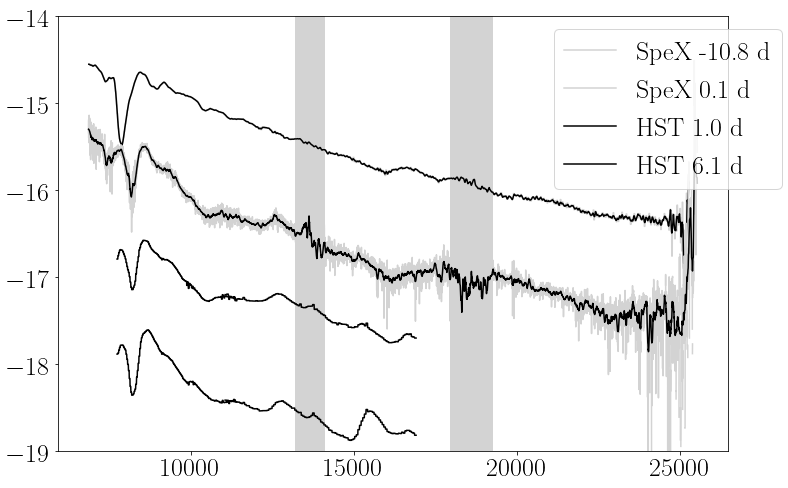

In [98]:
ynir1=np.log10(nir1res)
ynir2=np.log10(nir2res)-1
ynir31=np.log10(nir31res)-1
ynir32=np.log10(nir32res)-1
ynir41=np.log10(nir41res)-2
ynir42=np.log10(nir42res)-2

xynir32=np.log10(nir32['f'])-1
xynir42=np.log10(nir42['f'])-2

fig,ax=plt.subplots(1,1,figsize=(12,8))

fx=[13200,13200,14100,14100]
fy=[-100,100,100,-100]
plt.fill(fx,fy,c='lightgrey')
fx=[17950,17950,19250,19250]
plt.fill(fx,fy,c='lightgrey')

plt.plot(xnir,ynir1      ,label='SpeX {:4.1f} d'.format(nirep[0]),c='lightgrey')
sx,sy = xnir[np.isfinite(ynir1)],savgol_filter(ynir1[np.isfinite(ynir1)], 91, 3)
plt.plot(sx,sy,color='black')  

plt.plot(xnir,ynir2    ,label='SpeX  {:4.1f} d'.format(nirep[1]),c='lightgrey') 
sx,sy = xnir[np.isfinite(ynir2)],savgol_filter(ynir2[np.isfinite(ynir2)], 91, 3)
plt.plot(sx,sy,color='black')    

plt.plot(xnir[xnir<11450],ynir31[xnir<11450]    ,label='HST {:4.1f} d'.format(nirep[2]),c='k')
#sx,sy = xnir[([xnir<11450])&(np.isfinite(ynir31))],savgol_filter(ynir31[([xnir<11450])&(np.isfinite(ynir31))], 91, 3)
#plt.plot(sx,sy,color='black') 
plt.plot(xnir[xnir>11050],ynir32[xnir>11050]    ,label='_no_label_',c='k') 
#sx,sy = xnir[np.isfinite(ynir32)],savgol_filter(ynir32[np.isfinite(ynir32)], 91, 3)
#plt.plot(sx,sy,color='black')    

plt.plot(xnir[xnir<11450],ynir41[xnir<11450]     ,label='HST {:4.1f} d'.format(nirep[3]),c='k')
#sx,sy = xnir[([xnir<12000])&(np.isfinite(ynir31))],savgol_filter(ynir31[([xnir<12000])&(np.isfinite(ynir31))], 91, 3)
#plt.plot(sx,sy,color='black')  
plt.plot(xnir[xnir>11050],ynir42[xnir>11050]     ,label='_no_label_',c='k') 
#sx,sy = xnir[np.isfinite(ynir32)],savgol_filter(ynir32[np.isfinite(ynir32)], 91, 3)
#plt.plot(sx,sy,color='black')    
       
plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-19,-14.0)
#plt.xlim(11400,12000)
plt.legend(loc=1, bbox_to_anchor=(0.6, 0.5, 0.5, 0.5))
plt.savefig('NIR.eps',format='eps')
plt.show() 

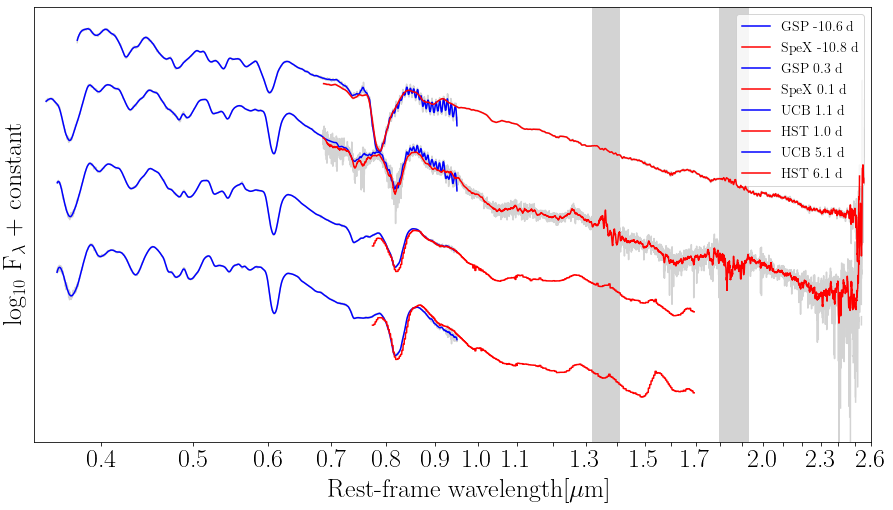

In [169]:
yopt1=np.log10(sp7res*20)
yopt2=np.log10(sp13res*55)-1
yopt3=np.log10(sp14res*45)-2
yopt4=np.log10(sp16res*45)-3

fig,ax=plt.subplots(1,1,figsize=(15,8))

fx=[13200,13200,14100,14100]
fy=[-100,100,100,-100]
plt.fill(fx,fy,c='lightgrey')
fx=[17950,17950,19250,19250]
plt.fill(fx,fy,c='lightgrey')

plt.plot(x,yopt1      ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt1)],savgol_filter(yopt1[np.isfinite(yopt1)], 91, 3)
plt.plot(sx,sy,color='blue',label='GSP {:4.1f} d'.format(ep[6]),zorder=10) 
plt.plot(xnir,ynir1      ,c='lightgrey')
sx,sy = xnir[np.isfinite(ynir1)],savgol_filter(ynir1[np.isfinite(ynir1)], 91, 3)
plt.plot(sx,sy,color='red',label='SpeX {:4.1f} d'.format(nirep[0]),zorder=10)  

plt.plot(x,yopt2    ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt2)],savgol_filter(yopt2[np.isfinite(yopt2)], 91, 3)
plt.plot(sx,sy,color='blue',label='GSP {:4.1f} d'.format(ep[12]),zorder=10)
plt.plot(xnir,ynir2    ,c='lightgrey') 
sx,sy = xnir[np.isfinite(ynir2)],savgol_filter(ynir2[np.isfinite(ynir2)], 91, 3)
plt.plot(sx,sy,color='red',label='SpeX {:4.1f} d'.format(nirep[1]),zorder=10)    

plt.plot(x,yopt3    ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt3)],savgol_filter(yopt3[np.isfinite(yopt3)], 91, 3)
plt.plot(sx,sy,color='blue',label='UCB {:4.1f} d'.format(ep[13])) 
plt.plot(xnir[xnir<11000],ynir31[xnir<11000]      ,label='HST {:4.1f} d'.format(nirep[2]),c='red',zorder=10)
plt.plot(xnir[xnir>11000],ynir32[xnir>11000]    ,label='_no_label_',c='red',zorder=10) 

plt.plot(x,yopt4    ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt4)],savgol_filter(yopt4[np.isfinite(yopt4)], 91, 3)
plt.plot(sx,sy,color='blue',label='UCB {:4.1f} d'.format(ep[15])) 
plt.plot(xnir[xnir<11000],ynir41[xnir<11000]      ,label='HST {:4.1f} d'.format(nirep[3]),c='red',zorder=10)
plt.plot(xnir[xnir>11000],ynir42[xnir>11000]      ,label='_no_label_',c='red',zorder=10) 

plt.xscale('log')
plt.xticks([3000.,4000.,5000.,6000.,7000.,8000.,9000.,10000.,11000.,12000.,13000.,14000.,15000.,16000.,17000.,18000.,19000.,20000.,21000.,22000.,23000.,24000.,25000.,26000.],['0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0','1.1','~','1.3','~','1.5','~','1.7','~','~','2.0','~','~','2.3','~','~','2.6'])  # Set label locations.
#ax.xaxis.set_minor_locator(plt.MultipleLocator(1000))
#ax.xaxis.set_major_locator(plt.MultipleLocator(5000))
#ax.tick_params(axis='x',which='minor',direction='out', length=6)#, width=2, colors='r',grid_color='r', grid_alpha=0.5)
#ax.tick_params(axis='x',which='major',direction='out', length=10)#, width=2, colors='r',grid_color='r', grid_alpha=0.5)

plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-19.5,-13.5)
#plt.ylim(-19,-17)
plt.xlim(3400,26000)
plt.legend(loc=1,fontsize=14)
plt.savefig('Opt_NIR.pdf',format='pdf')
plt.ylabel(r'log$_{10}$ F$_\lambda$ + constant')# [erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$]')
ax.get_yaxis().set_ticks([])
ax.text(9800,-20.25,r'Rest-frame wavelength[$\mu$m]',color='black', fontsize=26, horizontalalignment='center')
#plt.xlabel(r'Rest-frame wavlength[A]')
plt.show() 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


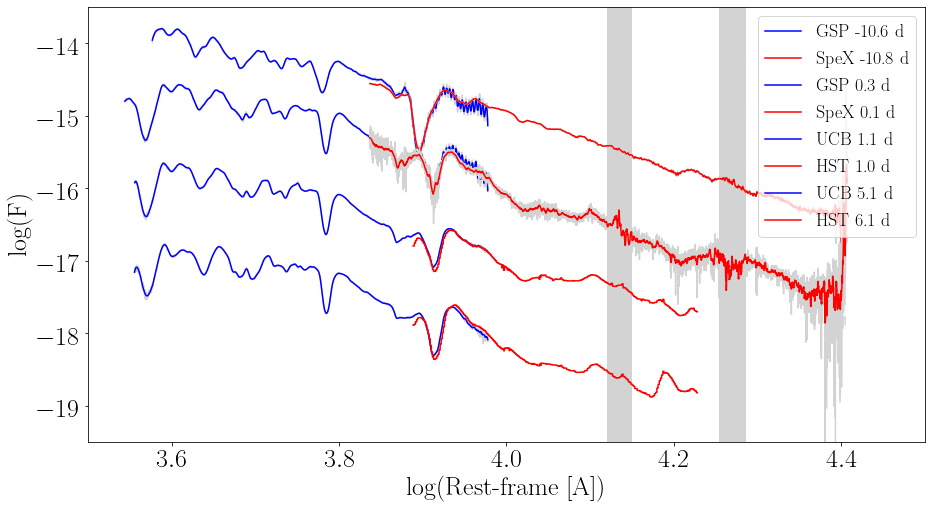

In [109]:
yopt1=np.log10(sp7res*20)
yopt2=np.log10(sp13res*55)-1
yopt3=np.log10(sp14res*45)-2
yopt4=np.log10(sp16res*45)-3

fig,ax=plt.subplots(1,1,figsize=(15,8))

fx=np.log10([13200,13200,14100,14100])
fy=[-100,100,100,-100]
plt.fill(fx,fy,c='lightgrey')
fx=np.log10([17950,17950,19250,19250])
plt.fill(fx,fy,c='lightgrey')

plt.plot(np.log10(x),yopt1      ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt1)],savgol_filter(yopt1[np.isfinite(yopt1)], 91, 3)
plt.plot(np.log10(sx),sy,color='blue',label='GSP {:4.1f} d'.format(ep[6]))
plt.plot(np.log10(xnir),ynir1      ,c='lightgrey')
sx,sy = xnir[np.isfinite(ynir1)],savgol_filter(ynir1[np.isfinite(ynir1)], 91, 3)
plt.plot(np.log10(sx),sy,color='red',label='SpeX {:4.1f} d'.format(nirep[0]))

plt.plot(np.log10(x),yopt2    ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt2)],savgol_filter(yopt2[np.isfinite(yopt2)], 91, 3)
plt.plot(np.log10(sx),sy,color='blue',label='GSP {:4.1f} d'.format(ep[12]))
plt.plot(np.log10(xnir),ynir2    ,c='lightgrey') 
sx,sy = xnir[np.isfinite(ynir2)],savgol_filter(ynir2[np.isfinite(ynir2)], 91, 3)
plt.plot(np.log10(sx),sy,color='red',label='SpeX {:4.1f} d'.format(nirep[1]))

plt.plot(np.log10(x),yopt3    ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt3)],savgol_filter(yopt3[np.isfinite(yopt3)], 91, 3)
plt.plot(np.log10(sx),sy,color='blue',label='UCB {:4.1f} d'.format(ep[13]))
plt.plot(np.log10(xnir[xnir<11000]),ynir31[xnir<11000]      ,label='HST {:4.1f} d'.format(nirep[2]),c='red')
plt.plot(np.log10(xnir[xnir>11000]),ynir32[xnir>11000]    ,label='_no_label_',c='red') 

plt.plot(np.log10(x),yopt4    ,c='lightgrey') 
sx,sy = x[np.isfinite(yopt4)],savgol_filter(yopt4[np.isfinite(yopt4)], 91, 3)
plt.plot(np.log10(sx),sy,color='blue',label='UCB {:4.1f} d'.format(ep[15]))
plt.plot(np.log10(xnir[xnir<11000]),ynir41[xnir<11000]      ,label='HST {:4.1f} d'.format(nirep[3]),c='red')
plt.plot(np.log10(xnir[xnir>11000]),ynir42[xnir>11000]      ,label='_no_label_',c='red') 


plt.axvline(6355,ymin=-1e-14,ymax=1e-14) 
plt.ylim(-19.5,-13.5)
plt.xlim(3.5,4.5)
plt.legend(loc=1, bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),fontsize=18)
plt.ylabel('log(F)')
plt.xlabel('log(Rest-frame [A])')
plt.savefig('Opt_NIR_log.eps',format='eps')
plt.show() 